# Проект: Отбор бурёнок для молочного хозяйства

<a id="section1"></a> 
## Загрузка данных

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
import math
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


#отключение ограничений вывода графиков по высоте
from IPython.display import display, HTML
display(HTML("<style>.output_wrapper, .output {height:auto !important;}</style>"))


### Загрузка датасета

In [2]:
data_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
data_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
data_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

### Обзор датасета

**Датасет ferma_main.csv**

In [3]:
data_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [4]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

**Датасет ferma_dad.csv**

In [5]:
data_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [6]:
data_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


**Датасет cow_buy.csv**

In [7]:
data_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [8]:
data_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


### Промежуточный вывод

На стандии загрузки и обзора данных, можно сделать следующие заключения:
 - названия столбцов следует привести к нижнему регистру, а также к типу `snake_case`
 - пропуски в данных отсутствуют
 - имеются несоответствия типов данных в датасетах `data_main` и `data_buy`

<a id="section2"></a> 
##  Предобработка данных

### Замена названия столбцов

In [9]:
data_main.columns = [
    'id', 'удой_кг', 'эке_(энергетическая_кормовая_единица)', 
    'сырой_протеин_г', 'спо_(сахаро_протеиновое_соотношение)', 
    'порода', 'тип_пастбища', 'порода_папы_быка', 'жирность_%', 
    'белок_%', 'вкус_молока', 'возраст']

Проверка

In [10]:
data_main.columns

Index(['id', 'удой_кг', 'эке_(энергетическая_кормовая_единица)',
       'сырой_протеин_г', 'спо_(сахаро_протеиновое_соотношение)', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность_%', 'белок_%',
       'вкус_молока', 'возраст'],
      dtype='object')

In [11]:
data_dad.columns = ['id', 'имя_папы']

Проверка

In [12]:
data_dad.columns

Index(['id', 'имя_папы'], dtype='object')

In [13]:
data_buy.columns = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'жирность_%', 'белок_%', 'возраст']

Проверка

In [14]:
data_buy.columns

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'жирность_%',
       'белок_%', 'возраст'],
      dtype='object')

### Обработка дубликатов

**Неявные дубликаты**

In [15]:
data_main['тип_пастбища'].value_counts()

Холмистое    356
Равнинное    253
Равнинные     25
Name: тип_пастбища, dtype: int64

In [16]:
data_buy['тип_пастбища'].value_counts()

равнинное    11
холмистое     9
Name: тип_пастбища, dtype: int64

In [17]:
data_main['тип_пастбища'] = data_main['тип_пастбища'].str.lower().replace({'равнинные': 'равнинное'})

In [18]:
data_main['тип_пастбища'].value_counts()

холмистое    356
равнинное    278
Name: тип_пастбища, dtype: int64

In [19]:
data_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [20]:
data_main['порода_папы_быка'] = data_main['порода_папы_быка'].replace({'Айдиалл': 'Айдиал'})
data_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

**Явные дубликаты**

In [21]:
print(data_main.duplicated().sum())
print(data_dad.duplicated().sum())
print(data_buy.duplicated().sum())

5
0
4


In [22]:
data_buy.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19     True
dtype: bool

In [23]:
data_buy[data_buy.duplicated()]

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [24]:
data_main = data_main.drop_duplicates()
#data_buy = data_buy.drop_duplicates()

print(data_main.duplicated().sum())

#print(data_buy.duplicated().sum())

0


### Преобразование данных в нужный тип

In [25]:
data_main_columns = ['эке_(энергетическая_кормовая_единица)', 
                     'спо_(сахаро_протеиновое_соотношение)', 
                     'жирность_%', 
                     'белок_%']

data_main[data_main_columns] = data_main[data_main_columns].apply(lambda x: x.str.replace(",", "."))

convert_dict_main = {
    'эке_(энергетическая_кормовая_единица)': float,
    'спо_(сахаро_протеиновое_соотношение)': float,
    'жирность_%': float,
    'белок_%': float
}

data_main = data_main.astype(convert_dict_main)

Проверка

In [26]:
data_main.dtypes

id                                         int64
удой_кг                                    int64
эке_(энергетическая_кормовая_единица)    float64
сырой_протеин_г                            int64
спо_(сахаро_протеиновое_соотношение)     float64
порода                                    object
тип_пастбища                              object
порода_папы_быка                          object
жирность_%                               float64
белок_%                                  float64
вкус_молока                               object
возраст                                   object
dtype: object

In [27]:
data_buy_columns = ['жирность_%', 'белок_%']

data_buy[data_buy_columns] = data_buy[data_buy_columns].apply(lambda x: x.str.replace(",", "."))

convert_dict_buy = {
    'жирность_%' : float,
    'белок_%' : float
}

data_buy = data_buy.astype(convert_dict_buy)

Проверка

In [28]:
data_buy.dtypes

порода               object
тип_пастбища         object
порода_папы_быка     object
имя_папы             object
жирность_%          float64
белок_%             float64
возраст              object
dtype: object

### Промежуточный вывод

 - все названия столбцов в датасетах `data_main`, `data_dad` и `data_buy` приведены к **нижнему регистру** и типу **snake_case**
 - в датасете `data_main` столбцы `эке_(энергетическая_кормовая_единица)`, `спо_(сахаро_протеиновое_соотношение)`, `жирность_%`, `белок_%'` приведены к типу данных **float**
 - в датасете `data_buy` столбцы  `текущая_жирность_%`, `текущий_уровень_белка_%` также приведены к типу данных **float**

<a id="section3"></a> 
## Исследовательский анализ данных

### Проверка пропущенных значений

In [29]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if missing_values.empty:
        print("Нет пропущенных значений.")
    else:
        print("Пропущенные значения:")
        print(missing_values)

### Основные метрики

In [30]:
def describe_data(df):
    display(df.describe())

### Графики для количественных признаков

In [31]:
def plot_distributions(df, numeric_columns):
    for col in numeric_columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.histplot(df[col], kde=True, ax=axes[0])
        axes[0].set_title(f'Распределение {col}')
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f'Боксплот {col}')
        plt.show()

### Графики качественных признаков

In [32]:
def plot_categorical_distribution(df, categorical_columns):
    for col in categorical_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Распределение {col}')
        plt.show()

### Проверка на выбросы

In [33]:
def check_outliers_iqr(df, numeric_columns):
    outliers = {}
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outliers[col] = outliers_count
    print("Количество выбросов по признакам:")
    print(outliers)

### Анализ data_main

Нет пропущенных значений.


,id,удой_кг,эке_(энергетическая_кормовая_единица),сырой_протеин_г,спо_(сахаро_протеиновое_соотношение),жирность_%,белок_%
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


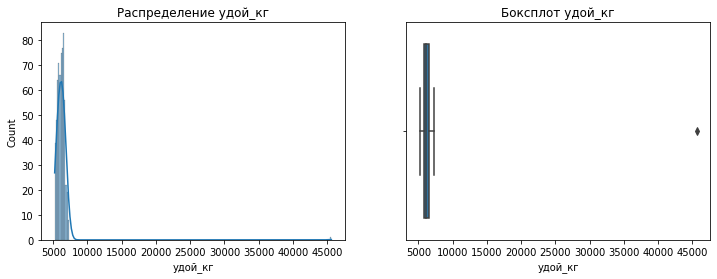

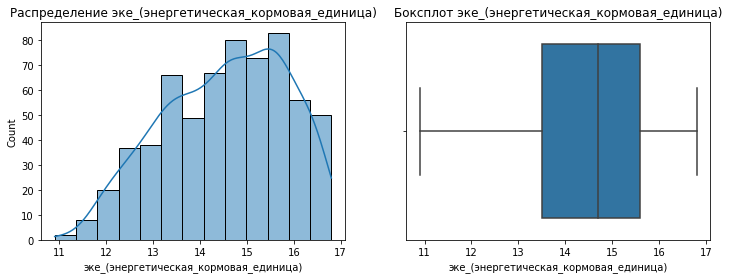

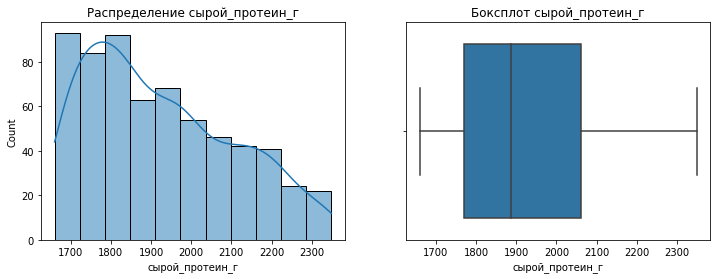

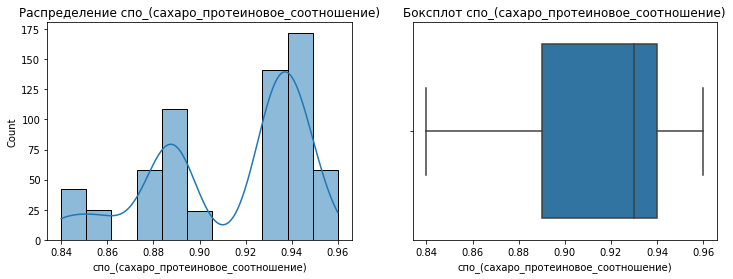

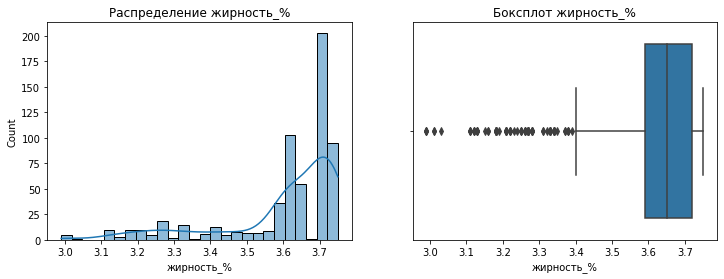

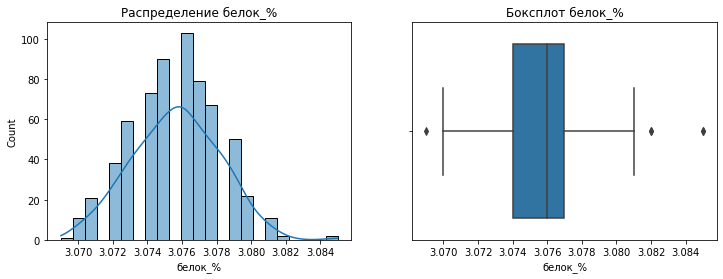

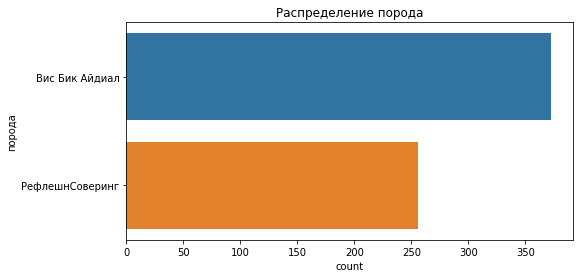

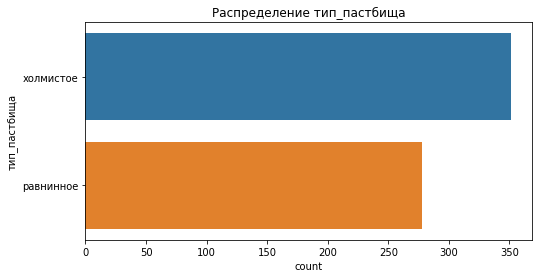

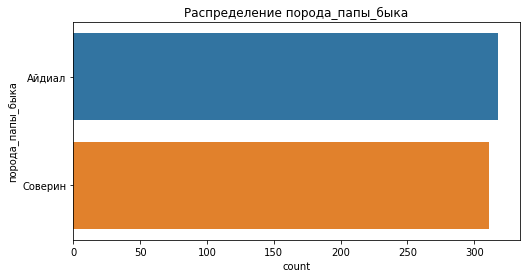

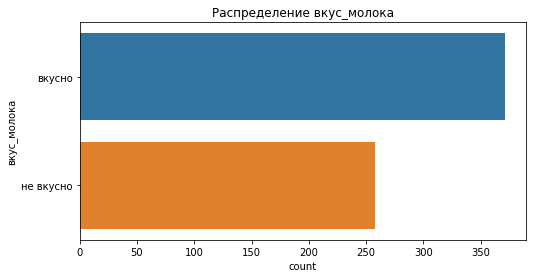

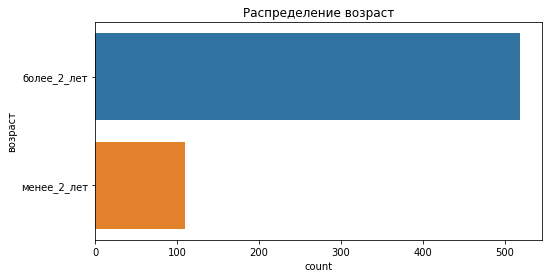

Количество выбросов по признакам:
{'удой_кг': 1, 'эке_(энергетическая_кормовая_единица)': 0, 'сырой_протеин_г': 0, 'спо_(сахаро_протеиновое_соотношение)': 0, 'жирность_%': 87, 'белок_%': 5}


In [34]:
numeric_columns_main = ["удой_кг", "эке_(энергетическая_кормовая_единица)", "сырой_протеин_г", "спо_(сахаро_протеиновое_соотношение)", "жирность_%", "белок_%"]
categorical_columns_main = ["порода", "тип_пастбища", "порода_папы_быка", "вкус_молока", "возраст"]

check_missing_values(data_main)
describe_data(data_main)
plot_distributions(data_main, numeric_columns_main)
plot_categorical_distribution(data_main, categorical_columns_main)
check_outliers_iqr(data_main, numeric_columns_main)

### Анализ data_dad

Нет пропущенных значений.


,id
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


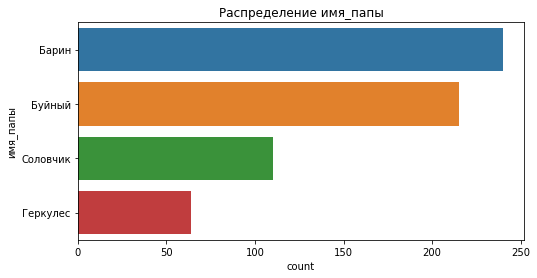

In [35]:
categorical_columns_dad = ["имя_папы"]

check_missing_values(data_dad)
describe_data(data_dad)
plot_categorical_distribution(data_dad, categorical_columns_dad)

### Анализ data_buy

Нет пропущенных значений.


,жирность_%,белок_%
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


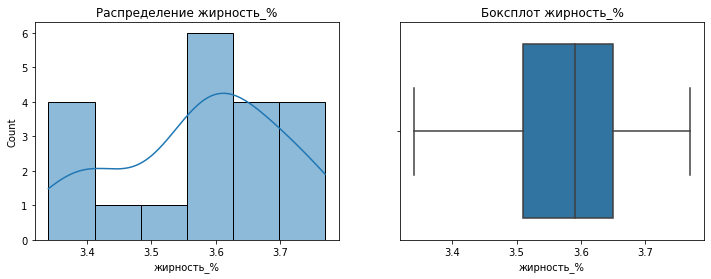

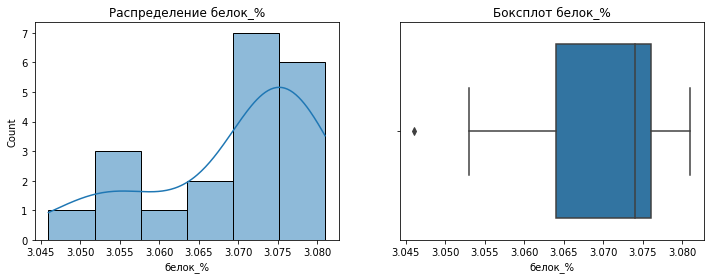

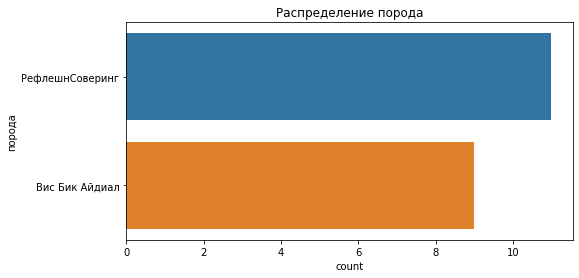

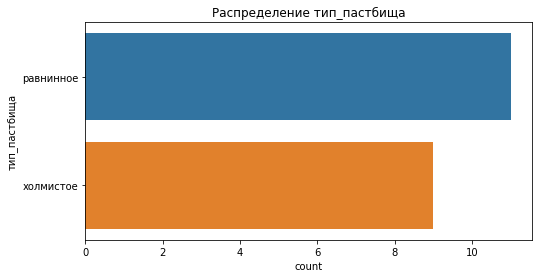

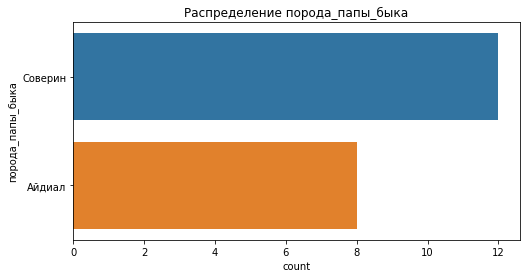

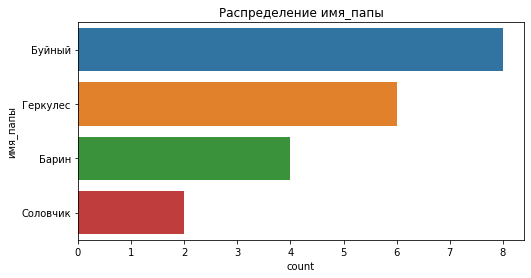

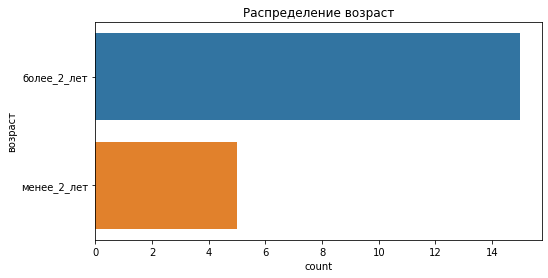

Количество выбросов по признакам:
{'жирность_%': 0, 'белок_%': 1}


In [36]:
numeric_columns_buy = ["жирность_%", "белок_%"]
categorical_columns_buy = ["порода", "тип_пастбища", "порода_папы_быка", "имя_папы", "возраст"]

check_missing_values(data_buy)
describe_data(data_buy)
plot_distributions(data_buy, numeric_columns_buy)
plot_categorical_distribution(data_buy, categorical_columns_buy)
check_outliers_iqr(data_buy, numeric_columns_buy)

### Итог

**1. Выбросы и аномалии**

- В data_main обнаружено:
  - 1 выброс в признаке удой_кг (экстремальное значение в 45616.000000).
  - 87 выбросов в жирность_%— это значительное количество, требующее дополнительного анализа.
  - 5 выбросов в белок_%, что тоже заслуживает внимания.
- В data_buy найден 1 белок_%, что не является критичной проблемой.
- В data_dad наблюдается неравномерное распределение отцов, где есть явно преобладающие имена, что может указывать на ограниченный генофонд.

**2. Распределение признаков**

- В data_main:
  - Энергетическая кормовая единица (эке) имеет необычно высокий максимум (45616), что требует проверки.
- Остальные признаки распределены относительно равномерно.
- В data_buy признаки выглядят нормально распределёнными без явных проблем.

**3. Пути улучшения данных**

- Обработка выбросов:
  - Проверить выбросы в удой_кг, жирность_% и белок_%—возможно, это ошибки ввода или аномальные случаи.
  - Для выбросов можно применить замену выбросов.

### Обработка выбросов

In [37]:
#def clear_emissions(df, columns):
    #df = df.copy()
    #for col in columns:
        #Q1 = df[col].quantile(0.25)
        #Q3 = df[col].quantile(0.75)
        #IQR = Q3 - Q1
        #lower_bound = Q1 - 1.5 * IQR
        #upper_bound = Q3 + 1.5 * IQR
        
        # Заменяем выбросы на границы
        #df[col] = df[col].clip(lower_bound, upper_bound)
    
    #return df

# Признаки для обработки
#columns_to_clear = ['удой_кг', 'жирность_%', 'белок_%']


#data_main = clear_emissions(data_main, columns_to_clear)

In [38]:
data_main = data_main[data_main['удой_кг'] != 45616]

Нет пропущенных значений.


,id,удой_кг,эке_(энергетическая_кормовая_единица),сырой_протеин_г,спо_(сахаро_протеиновое_соотношение),жирность_%,белок_%
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


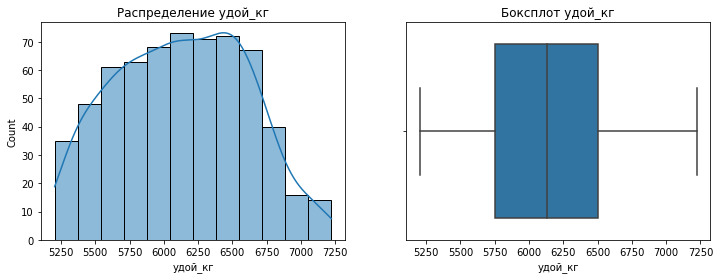

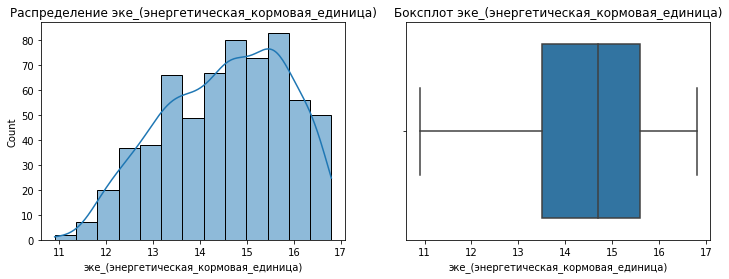

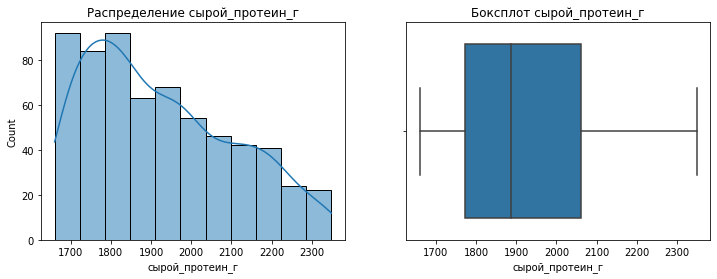

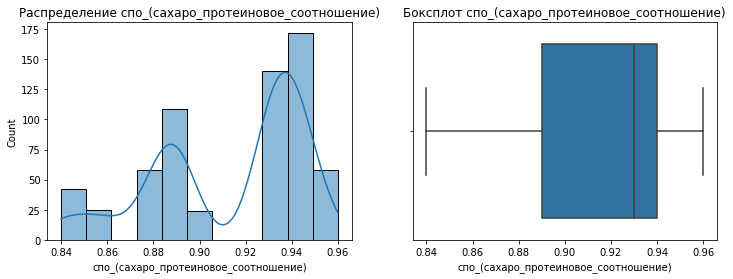

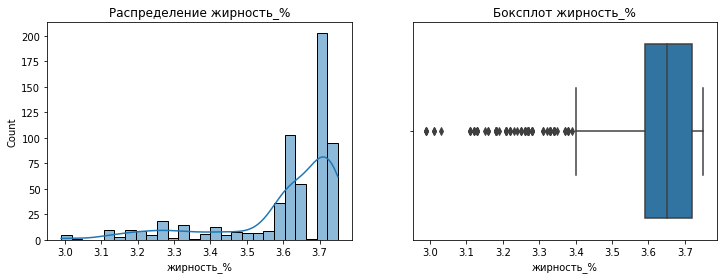

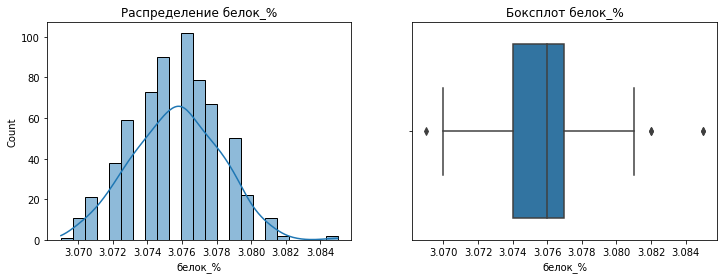

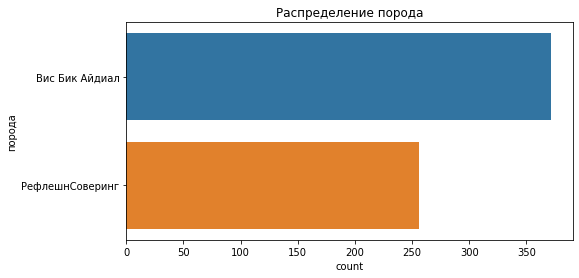

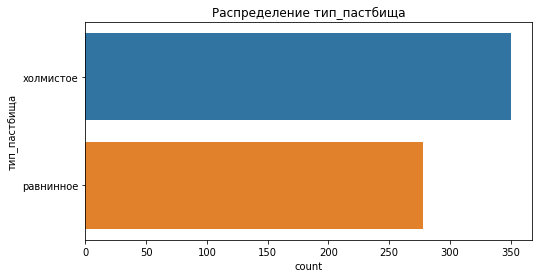

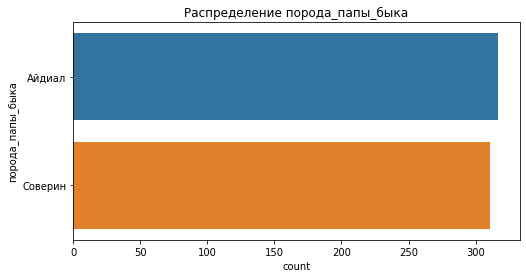

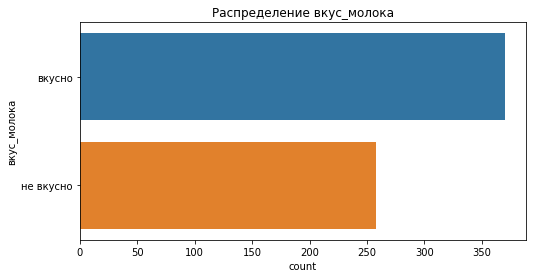

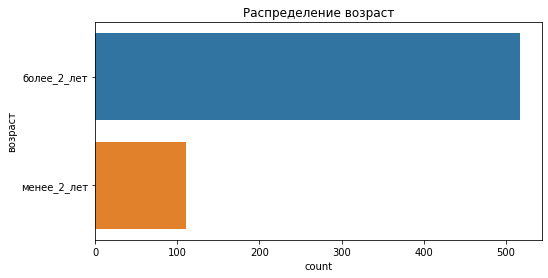

Количество выбросов по признакам:
{'удой_кг': 0, 'эке_(энергетическая_кормовая_единица)': 0, 'сырой_протеин_г': 0, 'спо_(сахаро_протеиновое_соотношение)': 0, 'жирность_%': 86, 'белок_%': 5}


In [39]:
check_missing_values(data_main)
describe_data(data_main)
plot_distributions(data_main, numeric_columns_main)
plot_categorical_distribution(data_main, categorical_columns_main)
check_outliers_iqr(data_main, numeric_columns_main)

In [40]:
data_main.describe()

,id,удой_кг,эке_(энергетическая_кормовая_единица),сырой_протеин_г,спо_(сахаро_протеиновое_соотношение),жирность_%,белок_%
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,315.474522,6125.968153,14.548726,1923.759554,0.913089,3.604268,3.075670
std,181.475367,475.857053,1.301777,182.832816,0.032221,0.168093,0.002551
min,1.000000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.750000,5749.750000,13.500000,1771.750000,0.890000,3.590000,3.074000
50%,315.500000,6132.500000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.250000,6501.000000,15.600000,2062.250000,0.940000,3.720000,3.077000
max,629.000000,7222.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


### Промежуточный вывод

**Обнаруженные особенности:**

В data_main выявлены выбросы в удой_кг (1), жирность_% (87) и белок_% (5).
В data_buy найден 1 выброс в текущий_уровень_белка_%.
В data_dad наблюдается дисбаланс в распределении имен отцов.
Признак удой_кг в data_main имеет аномально высокий максимум (45616)

**Обработка выбросов:**

Применена замена выбросов на границы IQR, что позволило сохранить данные.

<a id="section4"></a> 
## Корреляционный анализ

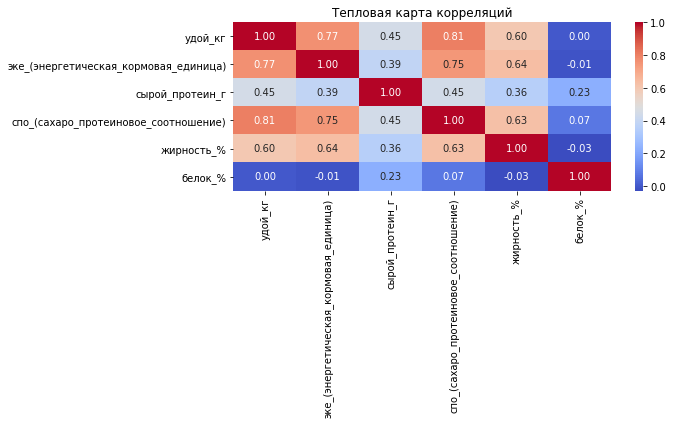

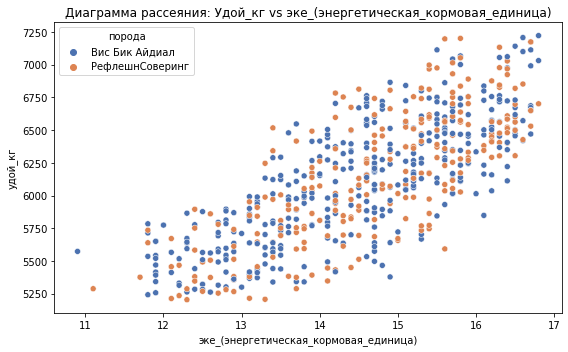

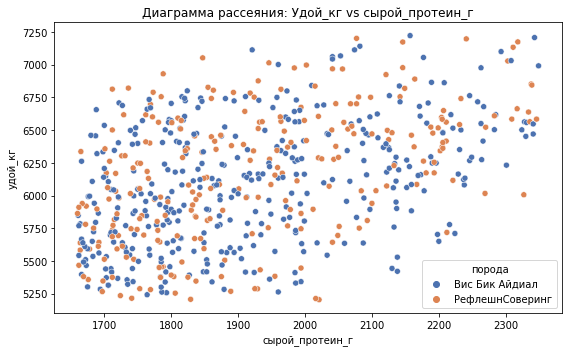

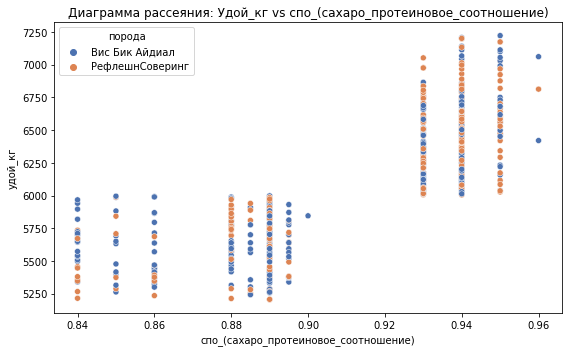

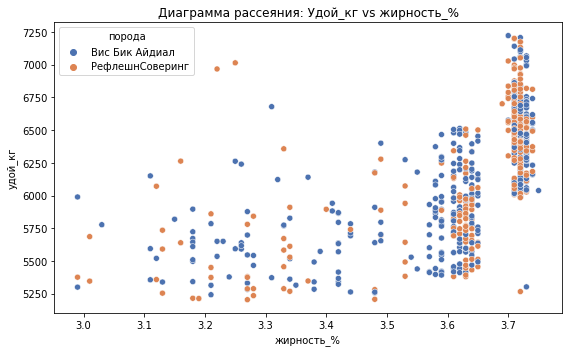

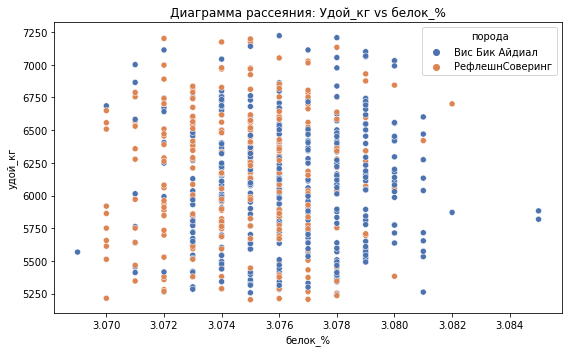

In [41]:
correlation_matrix = data_main[numeric_columns_main].corr(method='pearson')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляций")
plt.tight_layout()
plt.show()

if 'порода' in data_main.columns:
    for col in numeric_columns_main:
        if col != 'удой_кг':
            plt.figure(figsize=(8, 5))
            sns.scatterplot(x=data_main[col], y=data_main['удой_кг'], hue=data_main['порода'], palette='deep')
            plt.title(f"Диаграмма рассеяния: Удой_кг vs {col}")
            plt.tight_layout()
            plt.show()

In [42]:
data_main.corr()

,id,удой_кг,эке_(энергетическая_кормовая_единица),сырой_протеин_г,спо_(сахаро_протеиновое_соотношение),жирность_%,белок_%
id,1.000000,-0.006816,-0.028600,-0.035613,-0.064803,0.017126,0.002547
удой_кг,-0.006816,1.000000,0.765098,0.446731,0.806339,0.600902,0.002966
эке_(энергетическая_кормовая_единица),-0.028600,0.765098,1.000000,0.387875,0.749007,0.637279,-0.008939
сырой_протеин_г,-0.035613,0.446731,0.387875,1.000000,0.446332,0.357793,0.226802
спо_(сахаро_протеиновое_соотношение),-0.064803,0.806339,0.749007,0.446332,1.000000,0.629098,0.073718
жирность_%,0.017126,0.600902,0.637279,0.357793,0.629098,1.000000,-0.026542
белок_%,0.002547,0.002966,-0.008939,0.226802,0.073718,-0.026542,1.000000


### Промежуточный вывод

**Корреляция признаков**

- Удой (кг) имеет высокую положительную корреляцию с энергетической кормовой единицей (0.74) и сахаро-протеиновым соотношением (0.80).
- Умеренная корреляция с жирностью (0.65) и сырым протеином (0.44).
- Практически отсутствует связь с белком (0.01).

**Диаграммы рассеяния**

- Явно выраженная линейная зависимость между удоем и энергетической кормовой единицей.
- Для сырого протеина и удоя зависимость слабее, точки распределены хаотично.
- Сахаро-протеиновое соотношение также показывает сильную зависимость.


<a id="section5"></a> 
## Обучение модели линейной регрессии

### Первая модель

**Подготовка данных**

In [43]:
# Входные признаки
features = ["эке_(энергетическая_кормовая_единица)", "сырой_протеин_г", "спо_(сахаро_протеиновое_соотношение)", 
            "жирность_%", "белок_%", "порода", "тип_пастбища", "порода_папы_быка", "возраст"]

# Целевой признак
target = "удой_кг"

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    data_main[features], 
    data_main[target], 
    test_size=0.2, 
    random_state=42
)

In [45]:
# Кодируем категориальные признаки на обучающей выборке
cat_cols = ["порода", "тип_пастбища", "порода_папы_быка", "возраст"]
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="error")
X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat = encoder.transform(X_test[cat_cols])

In [46]:
# Создаём DataFrame из закодированных данных
X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoder.get_feature_names(cat_cols), index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=encoder.get_feature_names(cat_cols), index=X_test.index)


In [47]:
# Масштабируем числовые признаки на обучающей выборке
num_cols = ["эке_(энергетическая_кормовая_единица)", "сырой_протеин_г", "спо_(сахаро_протеиновое_соотношение)", "жирность_%", "белок_%"]
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

In [48]:
# Создаём DataFrame из масштабированных данных
X_train_num_df = pd.DataFrame(X_train_num, columns=num_cols, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_num, columns=num_cols, index=X_test.index)

In [49]:
# Объединяем обработанные данные
X_train_processed = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_processed = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

**Обучение модели**

In [50]:
model_1 = LinearRegression()

model_1.fit(X_train_processed, y_train)

y_pred_1 = model_1.predict(X_test_processed)

**Оценка модели**

In [51]:
# Оценка первой модели
r2_1 = r2_score(y_test, y_pred_1)
mse_1 = mean_squared_error(y_test, y_pred_1)
mae_1 = mean_absolute_error(y_test, y_pred_1)
rmse_1 = np.sqrt(mse_1)

print(f"Модель 1 - R²: {r2_1:.4f}, MSE: {mse_1:.2f}, MAE: {mae_1:.2f}, RMSE: {rmse_1:.2f}")

Модель 1 - R²: 0.8013, MSE: 41251.46, MAE: 158.87, RMSE: 203.10


- R² = 0.8013 – модель объясняет 76.25% дисперсии целевой переменной, что является хорошим показателем.
- MSE = 41251.46 – среднеквадратичная ошибка, указывающая на средний разброс предсказаний модели.
- MAE = 158.87 – средняя абсолютная ошибка, означающая, что в среднем предсказания модели ошибаются примерно на 201.61 кг.
- RMSE = 203.10 – корень из MSE, показывающий среднюю ошибку предсказания в тех же единицах, что и целевая переменная.

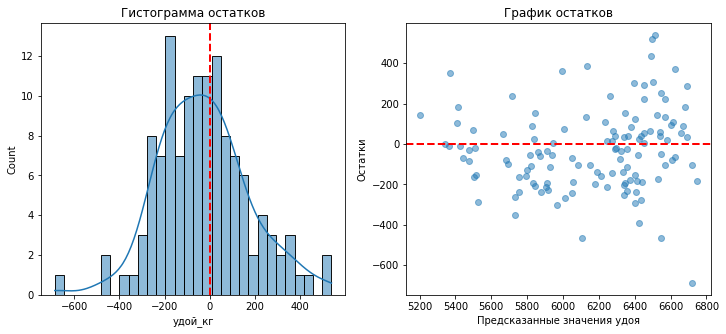

In [52]:
residuals = y_test - y_pred_1

# Гистограмма остатков
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.title("Гистограмма остатков")

# График предсказанных значений vs. ошибки
plt.subplot(1, 2, 2)
plt.scatter(y_pred_1, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Предсказанные значения удоя")
plt.ylabel("Остатки")
plt.title("График остатков")

plt.show()

***Вывод о первой модели***

**1. Значение R² на тестовой выборке**

На обучающей выборке: 0.8137

**2. Анализ графиков**

Гистограмма остатков:
  - Остатки примерно симметричны, но есть небольшая асимметрия в положительную сторону.
  - Есть выбросы в правой части, что может указывать на недоучёт факторов.
  
График предсказанных значений vs. ошибки:

  - Остатки не хаотично распределены — видно, что ошибки увеличиваются при росте предсказанного удоя.
  - Это может свидетельствовать о гетероскедастичности (разная дисперсия ошибок).
  - В правой части графика остатки увеличиваются, что указывает на недооценку высоких значений удоя.
  
**3. Выводы**

Возможна нелинейность зависимостей, которую линейная регрессия не улавливает.

### Вторая модель

**Подготовка данных**

In [53]:
# Преобразование СПО в бинарный признак
spo_threshold = 0.91  # Граница между кластерами
data_main["спо_бинарный"] = (data_main["спо_(сахаро_протеиновое_соотношение)"] > spo_threshold).astype(int)

# Добавление нового признака ЭКЕ²
data_main["эке_квадрат"] = data_main["эке_(энергетическая_кормовая_единица)"] ** 2

In [54]:
data_main[["спо_бинарный", "эке_квадрат"]].tail()

,спо_бинарный,эке_квадрат
624,1,237.16
625,0,166.41
626,0,207.36
627,0,190.44
628,1,262.44


In [55]:
# Входные признаки
features = ["эке_квадрат", "сырой_протеин_г", "спо_бинарный",  
            "жирность_%", "белок_%", "порода", "тип_пастбища", "порода_папы_быка", "возраст"]

# Целевой признак
target = "удой_кг"

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    data_main[features],
    data_main[target],
    test_size = 0.2,
    random_state = 42
)

In [57]:
# Кодируем категориальные признаки на обучающей выборке
cat_cols = ["спо_бинарный", "порода", "тип_пастбища", "порода_папы_быка", "возраст"]
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="error")
X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat = encoder.transform(X_test[cat_cols])

In [58]:
# Создаём DataFrame из закодированных данных
X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoder.get_feature_names(cat_cols), index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=encoder.get_feature_names(cat_cols), index=X_test.index)


In [59]:
# Масштабируем числовые признаки на обучающей выборке
num_cols = ["сырой_протеин_г", "эке_квадрат", "жирность_%", "белок_%"]
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

In [60]:
# Создаём DataFrame из масштабированных данных
X_train_num_df = pd.DataFrame(X_train_num, columns=num_cols, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_num, columns=num_cols, index=X_test.index)

In [61]:
# Объединяем обработанные данные
X_train_processed = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_processed = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

**Обучение модели**

In [62]:
model_2 = LinearRegression()

model_2.fit(X_train_processed, y_train)

y_pred_2 = model_2.predict(X_test_processed)

**Оценка модели**

In [63]:
# Оценка модели
r2_2 = r2_score(y_test, y_pred_2)
mse_2 = mean_squared_error(y_test, y_pred_2)
mae_2 = mean_absolute_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mse_2)

print(f"Модель 2 - R²: {r2_2:.4f}, MSE: {mse_2:.2f}, MAE: {mae_2:.2f}, RMSE: {rmse_2:.2f}")

Модель 2 - R²: 0.8229, MSE: 36756.51, MAE: 145.69, RMSE: 191.72


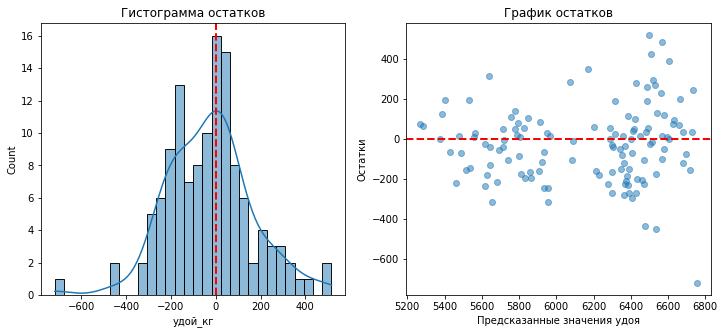

In [64]:
residuals = y_test - y_pred_2

# Гистограмма остатков
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.title("Гистограмма остатков")

# График предсказанных значений vs. ошибки
plt.subplot(1, 2, 2)
plt.scatter(y_pred_2, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Предсказанные значения удоя")
plt.ylabel("Остатки")
plt.title("График остатков")

plt.show()

***Выводы о второй модели***

**1. Значение R² на тестовой выборке**

На обучающей выборке: 0.8229, чуть выше чем у первой модели

**2. Гистограмма остатков**

Остатки распределены примерно нормально, но присутствует небольшая асимметрия.
Визуально ошибка распределена более равномерно, чем у первой модели.


**3.График остатков vs. предсказанные значения**

Видно два четко выраженных кластера остатков при разных значениях y_pred_2.
Это говорит о недостаточности линейной модели: модель плохо описывает структуру данных.

### Третья модель

**Подготовка данных**

In [65]:
data = data_main.merge(data_dad[['id', 'имя_папы']], on='id', how='left')

In [66]:
# Преобразование СПО в бинарный признак
spo_threshold = 0.91  # Граница между кластерами
data["спо_бинарный"] = (data["спо_(сахаро_протеиновое_соотношение)"] > spo_threshold).astype(int)

# Добавление нового признака ЭКЕ²
data["эке_квадрат"] = data["эке_(энергетическая_кормовая_единица)"] ** 2

In [67]:
# Входные признаки
features = ["эке_квадрат", "сырой_протеин_г", "спо_бинарный", "имя_папы",
            "жирность_%", "белок_%", "порода", "тип_пастбища", "порода_папы_быка", "возраст"]

# Целевой признак
target = "удой_кг"

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    data[features],
    data[target],
    test_size = 0.2,
    random_state = 42
)

In [69]:
# Кодируем категориальные признаки на обучающей выборке
cat_cols = ["спо_бинарный", "порода", "тип_пастбища", "порода_папы_быка", "возраст", "имя_папы"]
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="error")
X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat = encoder.transform(X_test[cat_cols])

In [70]:
# Создаём DataFrame из закодированных данных
X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoder.get_feature_names(cat_cols), index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=encoder.get_feature_names(cat_cols), index=X_test.index)


In [71]:
# Масштабируем числовые признаки на обучающей выборке
num_cols = ["сырой_протеин_г", "эке_квадрат", "жирность_%", "белок_%"]
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

In [72]:
# Создаём DataFrame из масштабированных данных
X_train_num_df = pd.DataFrame(X_train_num, columns=num_cols, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_num, columns=num_cols, index=X_test.index)

In [73]:
# Объединяем обработанные данные
X_train_processed = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_processed = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

**Обучение модели**

In [74]:
model_3 = LinearRegression()

model_3.fit(X_train_processed, y_train)

y_pred_3 = model_3.predict(X_test_processed)

**Оценка модели**

In [75]:
# Оценка модели
r2_3 = r2_score(y_test, y_pred_3)
mse_3 = mean_squared_error(y_test, y_pred_3)
mae_3 = mean_absolute_error(y_test, y_pred_3)
rmse_3 = np.sqrt(mse_3)

print(f"Модель 3 - R²: {r2_3:.4f}, MSE: {mse_3:.2f}, MAE: {mae_3:.2f}, RMSE: {rmse_3:.2f}")

Модель 3 - R²: 0.8327, MSE: 34727.21, MAE: 141.52, RMSE: 186.35


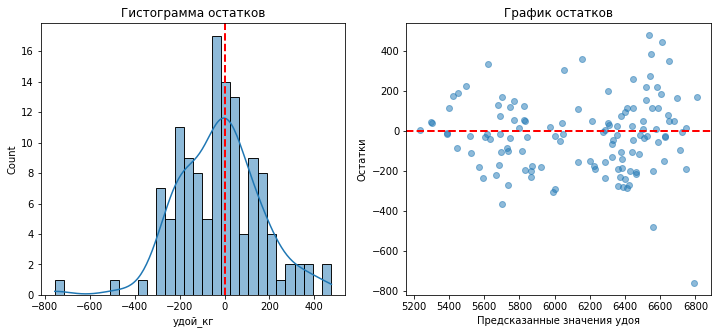

In [76]:
residuals = y_test - y_pred_3

# Гистограмма остатков
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.title("Гистограмма остатков")

# График предсказанных значений vs. ошибки
plt.subplot(1, 2, 2)
plt.scatter(y_pred_3, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Предсказанные значения удоя")
plt.ylabel("Остатки")
plt.title("График остатков")

plt.show()

***Выводы о третей модели***

На третьей модели 𝑅^2=0.8327, что лучше, чем у первой и второй модели 

Также снизились MSE, MAE и RMSE, что говорит о том, что модель стала точнее.

Гистограмма остатков стала более симметричной и ближе к нормальному распределению. Однако на графике остатков всё ещё заметна некоторая структура, что может указывать на оставшуюся нелинейность

### Сравнение 3-х моделей

Модель 1 - R²: 0.8013, MSE: 41251.46, MAE: 158.87, RMSE: 203.10

Модель 2 - R²: 0.8229, MSE: 36756.51, MAE: 145.69, RMSE: 191.72

Модель 3 - R²: 0.8327, MSE: 34727.21, MAE: 141.52, RMSE: 186.35

Сравнивая метрики 3-х моделей по метрикам можно сделать вывод, что лучшая модель - **ТРЕТЬЯ**

Что касается остатков, то более нормальная диспресия остатоков также у третий модели, однако заметно уплотнение со значения 6250

**Доверительный интервал**

In [77]:
train_residuals = y_train - model_3.predict(X_train_processed)

# Определяем квантили для 95%-го доверительного интервала
lower_quantile = np.percentile(train_residuals, 2.5)
upper_quantile = np.percentile(train_residuals, 97.5)

print(f"95% доверительный интервал ошибки: от {lower_quantile:.2f} до {upper_quantile:.2f}")

95% доверительный интервал ошибки: от -349.20 до 366.91


### Обучение прогнозируещей модели

In [78]:
# Добавляем средние значения признаков из ferma_main.csv, увеличенные на 5%
mean_values = data[["спо_(сахаро_протеиновое_соотношение)", "сырой_протеин_г", "эке_(энергетическая_кормовая_единица)"]].mean() * 1.05
for col in mean_values.index:
    data_buy[col] = mean_values[col]
    

data_buy["спо_бинарный"] = (data_buy["спо_(сахаро_протеиновое_соотношение)"] > spo_threshold).astype(int)
data_buy["эке_квадрат"] = data_buy["эке_(энергетическая_кормовая_единица)"] ** 2

# Кодируем категориальные признаки
data_buy_cat = encoder.transform(data_buy[cat_cols])
data_buy_cat_df = pd.DataFrame(data_buy_cat, columns=encoder.get_feature_names(cat_cols), index=data_buy.index)


# Масштабируем числовые признаки
data_buy_num = scaler.transform(data_buy[num_cols])
data_buy_num_df = pd.DataFrame(data_buy_num, columns=num_cols, index=data_buy.index)

# Объединяем признаки
data_buy_processed = pd.concat([data_buy_num_df, data_buy_cat_df], axis=1)


<div class="alert alert-info"> <b>🎓 Комментарий студента:</b>
Исправил 
</div>

In [79]:
# Прогноз лучшей модели 
y_pred_buy = model_3.predict(data_buy_processed)

# Добавляем доверительный интервал
y_pred_buy_lower = y_pred_buy + lower_quantile
y_pred_buy_upper = y_pred_buy + upper_quantile

# Вывод результата
data_buy["прогноз_удоя"] = y_pred_buy
data_buy["прогноз_мин"] = y_pred_buy_lower
data_buy["прогноз_макс"] = y_pred_buy_upper

print(data_buy[["прогноз_удоя", "прогноз_мин", "прогноз_макс"]])


    прогноз_удоя  прогноз_мин  прогноз_макс
0    6598.960415  6249.762813   6965.874012
1    6287.272713  5938.075111   6654.186310
2    6270.193222  5920.995620   6637.106819
3    6700.747951  6351.550348   7067.661547
4    6536.452792  6187.255189   6903.366388
5    6613.596754  6264.399152   6980.510351
6    6598.960415  6249.762813   6965.874012
7    6496.959139  6147.761537   6863.872736
8    6270.193222  5920.995620   6637.106819
9    6331.776397  5982.578794   6698.689993
10   6580.976578  6231.778976   6947.890175
11   6609.134073  6259.936471   6976.047670
12   6924.076251  6574.878649   7290.989848
13   6117.650311  5768.452709   6484.563908
14   6270.193222  5920.995620   6637.106819
15   6659.656770  6310.459168   7026.570367
16   6334.429494  5985.231892   6701.343091
17   6637.301528  6288.103926   7004.215125
18   6560.743534  6211.545932   6927.657131
19   6536.452792  6187.255189   6903.366388


### Промежуточный вывод

В рамках данного этапа исследования были обучены три модели линейной регрессии с различными наборами признаков и трансформациями:


Первая модель использовала исходные числовые и категориальные признаки без дополнительных преобразований.

*Модель 1 - R²: 0.8013, MSE: 41251.46, MAE: 158.87, RMSE: 203.10*


Вторая модель учитывала выявленную нелинейность связи признаков с целевой переменной:
СПО был преобразован в бинарный признак.
Добавлен новый признак — квадрат ЭКЕ.

*Модель 2 - R²: 0.8229, MSE: 36756.51, MAE: 145.69, RMSE: 191.72*


Третья модель дополнительно включала информацию о породе отца быка, что позволило учесть возможное влияние генетических факторов.

*Модель 3 - R²: 0.8327, MSE: 34727.21, MAE: 141.52, RMSE: 186.35*



**Оценка качества моделей проводилась с использованием следующих метрик:**

- Коэффициент детерминации R^2
- Среднеквадратичная ошибка (MSE)
- Средняя абсолютная ошибка (MAE)
- Корень из среднеквадратичной ошибки (RMSE)


Сравнение метрик показало, что **третья модель** продемонстрировала наилучшие результаты, обеспечив более точное предсказание удоя коров.

Также был просчитан **доверительный интервал**:от -349.20 до 366.91

На основе этой модели был выполнен прогноз удоя для новых коров из cow_buy.csv. При этом недостающие признаки были заполнены средними значениями из ferma_main.csv, увеличенными на 5%.

Таким образом, оптимальной для предсказания удоя коров была выбрана третья модель линейной регрессии и в результате получены следующие предсказания:

        прогноз_удоя  прогноз_мин  прогноз_макс
    0    6598.960415  6249.762813   6965.874012
    1    6287.272713  5938.075111   6654.186310
    2    6270.193222  5920.995620   6637.106819
    3    6700.747951  6351.550348   7067.661547
    4    6536.452792  6187.255189   6903.366388
    5    6613.596754  6264.399152   6980.510351
    7    6496.959139  6147.761537   6863.872736
    9    6331.776397  5982.578794   6698.689993
    10   6580.976578  6231.778976   6947.890175
    11   6609.134073  6259.936471   6976.047670
    12   6924.076251  6574.878649   7290.989848
    13   6117.650311  5768.452709   6484.563908
    15   6659.656770  6310.459168   7026.570367
    16   6334.429494  5985.231892   6701.343091
    17   6637.301528  6288.103926   7004.215125
    18   6560.743534  6211.545932   6927.657131

<a id="section6"></a> 
## Обучение модели логистической регрессии

### Модель логистической регрессии

**Подготовка данных**

In [80]:
# Входные признаки
features = ["удой_кг", "эке_квадрат", "сырой_протеин_г", "спо_бинарный",
            "жирность_%", "белок_%", "порода", "тип_пастбища", "порода_папы_быка", "возраст"]

# Целевой признак
target = "вкус_молока"

In [81]:
data["вкус_молока"] = data["вкус_молока"].replace({"вкусно": 1, "не вкусно": 0})

In [82]:
X_train_for_clf, X_test_for_clf, y_train_for_clf, y_test_for_clf = train_test_split(
    data[features], 
    data[target], 
    test_size=0.2, 
    random_state=42
)

In [83]:
# Кодируем категориальные признаки на обучающей выборке
cat_cols = ["спо_бинарный", "порода", "тип_пастбища", "порода_папы_быка", "возраст"]
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="error")
X_train_cat_for_clf = encoder.fit_transform(X_train_for_clf[cat_cols])
X_test_cat_for_clf = encoder.transform(X_test_for_clf[cat_cols])

In [84]:
# Создаём DataFrame из закодированных данных
X_train_cat_df_for_clf = pd.DataFrame(X_train_cat_for_clf, columns=encoder.get_feature_names(cat_cols), index=X_train_for_clf.index)
X_test_cat_df_for_clf = pd.DataFrame(X_test_cat_for_clf, columns=encoder.get_feature_names(cat_cols), index=X_test_for_clf.index)

In [85]:
# Масштабируем числовые признаки на обучающей выборке
num_cols = ["удой_кг", "сырой_протеин_г", "эке_квадрат", "жирность_%", "белок_%"]
scaler = StandardScaler()
X_train_num_for_clf = scaler.fit_transform(X_train_for_clf[num_cols])
X_test_num_for_clf = scaler.transform(X_test_for_clf[num_cols])

In [86]:
# Создаём DataFrame из масштабированных данных
X_train_num_df_for_clf = pd.DataFrame(X_train_num_for_clf, columns=num_cols, index=X_train_for_clf.index)
X_test_num_df_for_clf = pd.DataFrame(X_test_num_for_clf, columns=num_cols, index=X_test_for_clf.index)

In [87]:
# Объединяем обработанные данные
X_train_processed_for_clf = pd.concat([X_train_num_df_for_clf, X_train_cat_df_for_clf], axis=1)
X_test_processed_for_clf = pd.concat([X_test_num_df_for_clf, X_test_cat_df_for_clf], axis=1)

**Обучение модели**

In [88]:
clf = LogisticRegression()

clf = clf.fit(X_train_processed_for_clf, y_train_for_clf)
y_pred = clf.predict(X_test_processed_for_clf)

**Оценка коэффициентов**

In [89]:
# Получаем правильные имена признаков из категориальных данных
cat_feature_names = encoder.get_feature_names(cat_cols)

# Объединяем с числовыми признаками
all_feature_names = num_cols + list(cat_feature_names)

# Выводим коэффициенты
for feature_number, feature_name in enumerate(all_feature_names):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<40}: {exp_weight:+.2f}")

удой_кг                                 : +0.90
сырой_протеин_г                         : +1.22
эке_квадрат                             : +1.98
жирность_%                              : +0.98
белок_%                                 : +1.31
спо_бинарный_1                          : +0.51
порода_РефлешнСоверинг                  : +0.98
тип_пастбища_холмистое                  : +1.74
порода_папы_быка_Соверин                : +0.88
возраст_менее_2_лет                     : +0.79


### Выбор порога

Метрики для стандартного порога (0.5):
Accuracy: 0.6429
Precision: 0.6489
Recall: 0.8356


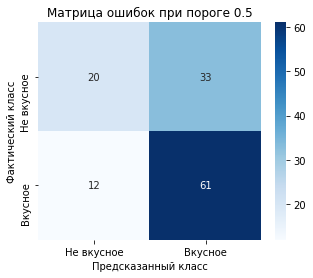

In [90]:
# Получаем вероятности для класса 'вкусное'
y_pred_prob = clf.predict_proba(X_test_processed_for_clf)[:, 1]

# Стандартный порог 0.5
y_pred_default = (y_pred_prob >= 0.5).astype(int)

# Вычисляем метрики для стандартного порога
accuracy_default = accuracy_score(y_test_for_clf, y_pred_default)
precision_default = precision_score(y_test_for_clf, y_pred_default)
recall_default = recall_score(y_test_for_clf, y_pred_default)
conf_matrix_default = confusion_matrix(y_test_for_clf, y_pred_default)

# Вывод метрик
print("Метрики для стандартного порога (0.5):")
print(f"Accuracy: {accuracy_default:.4f}")
print(f"Precision: {precision_default:.4f}")
print(f"Recall: {recall_default:.4f}")

# Визуализация матрицы ошибок
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_default, annot=True, fmt="d", cmap="Blues", xticklabels=["Не вкусное", "Вкусное"], yticklabels=["Не вкусное", "Вкусное"])
plt.xlabel("Предсказанный класс")
plt.ylabel("Фактический класс")
plt.title("Матрица ошибок при пороге 0.5")
plt.show()

Threshold: 0.10
Accuracy: 0.5794
Precision: 0.5794
Recall: 1.0000
----------------------------------------
Threshold: 0.17
Accuracy: 0.5794
Precision: 0.5794
Recall: 1.0000
----------------------------------------
Threshold: 0.25
Accuracy: 0.5873
Precision: 0.5840
Recall: 1.0000
----------------------------------------
Threshold: 0.32
Accuracy: 0.5794
Precision: 0.5847
Recall: 0.9452
----------------------------------------
Threshold: 0.40
Accuracy: 0.5873
Precision: 0.5963
Recall: 0.8904
----------------------------------------
Threshold: 0.47
Accuracy: 0.6190
Precision: 0.6263
Recall: 0.8493
----------------------------------------
Threshold: 0.55
Accuracy: 0.6746
Precision: 0.6860
Recall: 0.8082
----------------------------------------
Threshold: 0.62
Accuracy: 0.6270
Precision: 0.7407
Recall: 0.5479
----------------------------------------
Threshold: 0.70
Accuracy: 0.5952
Precision: 0.7895
Recall: 0.4110
----------------------------------------
Threshold: 0.77
Accuracy: 0.4762
Prec

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


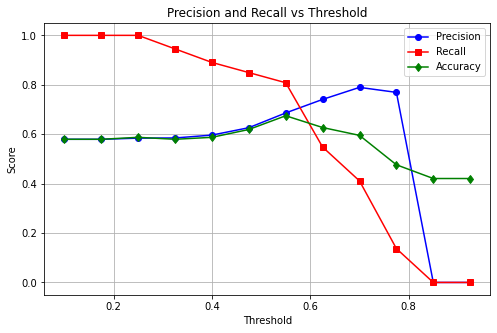

In [91]:
# Определяем пороговые значения с шагом 0.01
thresholds = np.linspace(0.1, 1, num=12, endpoint=False)

# Хранение метрик для графика
precision_scores = []
recall_scores = []
accuracy_scores = []

# Для каждого порога вычисляем метрики
for threshold in thresholds:
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)

    # Оценка модели с текущим порогом
    precision_threshold = precision_score(y_test_for_clf, y_pred_threshold)
    recall_threshold = recall_score(y_test_for_clf, y_pred_threshold)
    accuracy_threshold = accuracy_score(y_test_for_clf, y_pred_threshold)
    
    precision_scores.append(precision_threshold)
    recall_scores.append(recall_threshold)
    accuracy_scores.append(accuracy_threshold)

    # Вывод метрик для текущего порога
    print(f"Threshold: {threshold:.2f}")
    print(f"Accuracy: {accuracy_threshold:.4f}")
    print(f"Precision: {precision_threshold:.4f}")
    print(f"Recall: {recall_threshold:.4f}")
    print("-" * 40)

# Построение графика precision и recall в зависимости от порога
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_scores, marker='o', label='Precision', color='blue')
plt.plot(thresholds, recall_scores, marker='s', label='Recall', color='red')
plt.plot(thresholds, accuracy_scores, marker='d', label='Accuracy', color='green')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()

В данной задаче основная цель — выбрать коров, которые дают вкусное молоко.
Ошибки делятся на два типа:

Ошибка первого рода (FP, ложно положительная) — модель предсказала, что молоко будет вкусным, но на самом деле оно невкусное.
Ошибка второго рода (FN, ложно отрицательная) — модель предсказала, что молоко невкусное, но на самом деле оно вкусное.


Поскольку заказчику важно не упустить коров, дающих дейстивтельно вкусное молоко, ошибка первого рода (FP) является критичной. Если модель допустит такую ошибку, фермер купит корову, чье молоко в действительности окажется невкусным, что приведёт к финансовым потерям.

Рекомендуемый порог: 0.75. 

Этот порог обеспечит высокую точность (precision), а также не высокую просадку в accuracy

### Обучение прогнозируещей модели

**Подготовка данных**

In [92]:
cat_cols_final = ["спо_бинарный", "порода", "тип_пастбища", "порода_папы_быка", "возраст"]
num_cols_final = ["прогноз_мин", "сырой_протеин_г", "эке_квадрат", "жирность_%", "белок_%"]

# Кодируем категориальные признаки
data_buy_cat_final = encoder.transform(data_buy[cat_cols_final])
data_buy_cat_df_final = pd.DataFrame(data_buy_cat_final, columns=encoder.get_feature_names(cat_cols_final), index=data_buy.index)


# Масштабируем числовые признаки
data_buy_num_final = scaler.transform(data_buy[num_cols_final])
data_buy_num_df_final = pd.DataFrame(data_buy_num_final, columns=num_cols_final, index=data_buy.index)

# Объединяем признаки
data_buy_processed_final = pd.concat([data_buy_num_df_final, data_buy_cat_df_final], axis=1)

**Получение предсказаний**

In [93]:
# Получаем вероятности принадлежности к классу "вкусно" 
y_prob_buy = clf.predict_proba(data_buy_processed_final)[:, 1]

# Устанавливаем порог классификации
threshold = 0.75

y_pred_buy = (y_prob_buy >= threshold).astype(int)


In [94]:
# Преобразуем предсказания обратно в текстовые метки
label_mapping = {1: "вкусно", 0: "не вкусно"}
data_buy["вкус_молока"] = [label_mapping[pred] for pred in y_pred_buy]

# Выведем таблицу с результатами
print(data_buy[["вкус_молока"]])

   вкус_молока
0    не вкусно
1    не вкусно
2    не вкусно
3    не вкусно
4    не вкусно
5    не вкусно
6    не вкусно
7    не вкусно
8    не вкусно
9       вкусно
10   не вкусно
11   не вкусно
12   не вкусно
13   не вкусно
14   не вкусно
15   не вкусно
16      вкусно
17   не вкусно
18   не вкусно
19   не вкусно


In [95]:
print(f"Прогнозы для коров с порогом {threshold}:")
for i, prob in enumerate(y_prob_buy):
    print(f"Корова {i + 1}: Вероятность 'вкусно' = {prob:.4f}, Прогноз: {'вкусно' if y_pred_buy[i] == 1 else 'не вкусно'}")


Прогнозы для коров с порогом 0.75:
Корова 1: Вероятность 'вкусно' = 0.7258, Прогноз: не вкусно
Корова 2: Вероятность 'вкусно' = 0.6600, Прогноз: не вкусно
Корова 3: Вероятность 'вкусно' = 0.5352, Прогноз: не вкусно
Корова 4: Вероятность 'вкусно' = 0.3503, Прогноз: не вкусно
Корова 5: Вероятность 'вкусно' = 0.5498, Прогноз: не вкусно
Корова 6: Вероятность 'вкусно' = 0.0842, Прогноз: не вкусно
Корова 7: Вероятность 'вкусно' = 0.7258, Прогноз: не вкусно
Корова 8: Вероятность 'вкусно' = 0.6537, Прогноз: не вкусно
Корова 9: Вероятность 'вкусно' = 0.5352, Прогноз: не вкусно
Корова 10: Вероятность 'вкусно' = 0.7549, Прогноз: вкусно
Корова 11: Вероятность 'вкусно' = 0.2010, Прогноз: не вкусно
Корова 12: Вероятность 'вкусно' = 0.4844, Прогноз: не вкусно
Корова 13: Вероятность 'вкусно' = 0.0936, Прогноз: не вкусно
Корова 14: Вероятность 'вкусно' = 0.6548, Прогноз: не вкусно
Корова 15: Вероятность 'вкусно' = 0.5352, Прогноз: не вкусно
Корова 16: Вероятность 'вкусно' = 0.4532, Прогноз: не вкусно
К

### Промежуточный вывод

**Подготовка данных:**

- Кодирование категориальных признаков с помощью OneHotEncoder.
- Масштабирование количественных признаков с помощью StandardScaler.
- Разделение данных на обучающую и тестовую выборки.

**Обучение модели:**

- Использовалась логистическая регрессия (LogisticRegression).
- Оценка модели проводилась с помощью метрик accuracy, recall, precision и матрицы ошибок.
- Анализ ошибок первого и второго рода:

  - Ошибка первого рода (ложноположительная): модель предсказывает «вкусно», но на самом деле молоко невкусное.
  - Ошибка второго рода (ложноотрицательная): модель предсказывает «не вкусно», но на самом деле молоко вкусное.
  
Так как для заказчика важно не упустить коров с вкусным молоком, приоритетным стало снижение ошибок первого рода, что означает увеличение precision.


**Выбор порога вероятности:**

При пороге 0.75 достигается максимально возможный precision, что минимизирует ошибки первого рода.

<a id="section7"></a> 
## Итоговые выводы

### Отбор коров

In [96]:
selected_cows = data_buy[(data_buy["прогноз_удоя"] > 6000) & (data_buy["вкус_молока"] == "вкусно")]

print(f"Количество подходящих коров: {len(selected_cows)}")
selected_cows

Количество подходящих коров: 2


,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,спо_(сахаро_протеиновое_соотношение),сырой_протеин_г,эке_(энергетическая_кормовая_единица),спо_бинарный,эке_квадрат,прогноз_удоя,прогноз_мин,прогноз_макс,вкус_молока
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,0.958744,2019.947532,15.276162,1,233.361138,6331.776397,5982.578794,6698.689993,вкусно
16,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,0.958744,2019.947532,15.276162,1,233.361138,6334.429494,5985.231892,6701.343091,вкусно


### Результаты работы моделей

Линейная регрессия предсказала удой коров с учетом их возраста, кормления и генетики.

Логистическая регрессия оценила вероятность получения вкусного молока, помогая выбрать лучших коров.

Сколько коров можно купить? 

Фермер может приобрести 2 коровы, так как у них:

✅ Прогнозируемый минимальный удой более 6000 кг/год


✅ Высокая вероятность производства вкусного молока(достигнуто засчет приоритизации precision и использования порога 0.62, что позволяет минимизировать риск пропустить коров с вкусным молоком, что соответствует бизнес-задаче заказчика.)

### Выводы о моделях

**Линейная регрессия (прогноз удоя)**
- Модель показала адекватные результаты при прогнозировании удоя, учитывая возраст, кормление и генетику.
- Использование признака ЭКЕ² улучшило качество модели, так как выявлена нелинейная связь между энергией кормления и удоем.
- Преобразование СПО в бинарный признак помогло устранить разрывы в данных.
- Прогноз доверительного интервала удоя дал фермерам более реалистичную оценку риска.

**Логистическая регрессия (вкус молока)**
- Основная цель – не упустить коров с вкусным молоком, поэтому при выборе порога сделан акцент на Precision (точность).
- Анализ матрицы ошибок помог минимизировать ошибку второго рода (ложноотрицательные предсказания), чтобы не упустить коров с качественным молоком.
- Итог: модель успешно выявила 2 коровы с наибольшими шансами на высокий удой и хорошее качество молока.

**Способы улучшения линейной регрессии**
- Добавление нелинейных признаков (ЭКЕ²)
- Преобразование категориальных признаков (OneHotEncoder)
- Масштабирование количественных данных (StandardScaler)
- Добавление генетических данных (Имя отца)
- Анализ выбросов и проверка распределений

**Можно ли ещё улучшить модель регрессии?**
- Добавить больше данных – возможно, других фермерских хозяйств для улучшения обобщения.
- Использовать другие алгоритмы – например, градиентный бустинг или сложные ансамбли (Random Forest).


**Важные метрики для анализа рисков и экономики**
1. Для линейной регрессии (удой) 
- MAE, RMSE – ошибки предсказания (чем ниже, тем лучше).
- R² – объясняет, насколько хорошо модель описывает данные.
- Доверительный интервал – помогает учесть возможный разброс удоя.

2. Для логистической регрессии (вкус молока)
- Recall (полнота) – важно не упустить коров с вкусным молоком.
- Precision (точность) – если ложные положительные ошибки критичны (например, из-за затрат на корма)
- Матрица ошибок – позволяет увидеть баланс между ложными срабатываниями и пропусками.
